In [1]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
IMAGE_SIZE = [224,224]

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf

In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" #tgz = tar ball (just like zip file)
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

In [5]:
data_dir

'C:\\Users\\nehac\\.keras\\datasets\\flower_photos'

In [6]:
vgg = VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)#without output layer

In [7]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
for layer in vgg.layers:
    layer.trainable = False

In [9]:
x = Flatten()(vgg.output)
prediction = Dense(5,activation='softmax')(x)

In [10]:
model = Model(inputs=vgg.input,outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.2)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2)

In [15]:
training_set = train_datagen.flow_from_directory(directory=data_dir,
                                               target_size=(224,224),
                                                 batch_size=64,
                                               class_mode='categorical',
                                                subset='training')

Found 2939 images belonging to 5 classes.


In [16]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [17]:
test_set = test_datagen.flow_from_directory(directory=data_dir,
                                            target_size=(224,224),
                                            batch_size=64,
                                            class_mode='categorical',
                                           subset='validation')

Found 731 images belonging to 5 classes.


In [18]:
history = model.fit(training_set,validation_data=test_set,epochs=10)

Epoch 1/10
46/46 [==============================] - 989s 22s/step - loss: 1.0906 - accuracy: 0.6073 - val_loss: 0.6110 - val_accuracy: 0.7948
Epoch 2/10
46/46 [==============================] - 1028s 22s/step - loss: 0.5404 - accuracy: 0.8132 - val_loss: 0.5687 - val_accuracy: 0.7921
Epoch 3/10
46/46 [==============================] - 862s 19s/step - loss: 0.4275 - accuracy: 0.8472 - val_loss: 0.5108 - val_accuracy: 0.8235
Epoch 4/10
46/46 [==============================] - 868s 19s/step - loss: 0.3285 - accuracy: 0.8915 - val_loss: 0.5567 - val_accuracy: 0.8098
Epoch 5/10
46/46 [==============================] - 873s 19s/step - loss: 0.2896 - accuracy: 0.9040 - val_loss: 0.5623 - val_accuracy: 0.7934
Epoch 6/10
46/46 [==============================] - 881s 19s/step - loss: 0.2472 - accuracy: 0.9211 - val_loss: 0.5169 - val_accuracy: 0.8249
Epoch 7/10
46/46 [==============================] - 867s 19s/step - loss: 0.2109 - accuracy: 0.9401 - val_loss: 0.5800 - val_accuracy: 0.8126
Epoch

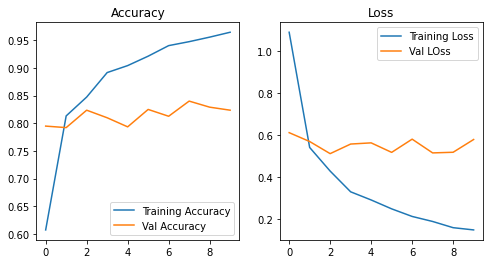

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [36]:
img = load_img('tulip.jpg',target_size=(224,224))

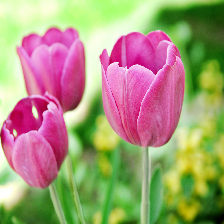

In [37]:
img

In [38]:
img_array = img_to_array(img)
img_array.shape

(224, 224, 3)

In [39]:
img_array = img_array.reshape(1,224, 224, 3)

In [40]:
img_array.shape

(1, 224, 224, 3)

In [41]:
class_name = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [42]:
model.predict(img_array).round()

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [43]:
np.argmax(model.predict(img_array))

4

In [44]:
class_name[np.argmax(model.predict(img_array))]

'tulips'